In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
data = pd.read_csv('../1. 행정동_상위변수_데이터/행정동_음주운전_합본_cp949.csv', encoding = 'cp949')

In [34]:
data.head()

,읍면동,자동차 등록 대수,인구수,횡단보도 개수,음식점 수,버스정류장 개수,음주 교통사고 건수,음주운전 적발 건수
0,가덕도동,2327,3941,4,25,88,1.14,0.66
1,가락동,2095,2345,33,12,57,0.68,0.40
2,가야1동,5540,19224,14,36,13,5.42,2.65
3,가야2동,5540,16844,8,43,18,4.75,2.32
4,감만1동,7514,12970,14,25,40,1.37,1.37


In [35]:
X = data.drop(columns = ['읍면동', '음주운전 적발 건수'])
y = data['음주운전 적발 건수']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# PCA 적용
pca = PCA(n_components=0.95, random_state=2025)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
RF = RandomForestRegressor(random_state=29)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
RF_mse = mean_squared_error(y_test, y_pred)
RF_mae = mean_absolute_error(y_test, y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(y_test, y_pred)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error (MSE): {RF_mse}")
print(f"Mean Absolute Error (MAE): {RF_mae}")
print(f"Root Mean Squared Error (RMSE): {RF_rmse}")
print(f"R2 Score: {RF_r2}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
468 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\User\anaconda3\Lib\site-packages\s

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error (MSE): 0.9437498453197691
Mean Absolute Error (MAE): 0.5632626356953797
Root Mean Squared Error (RMSE): 0.9714678817746726
R2 Score: 0.858086098738182


In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Support Vector Machine Model
svm_model = SVR()

# Define the parameter grid for SVM hyperparameter tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 15],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Perform GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Best parameters and model for SVM
best_svm_params = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Predict with the best SVM model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the SVM model
SVM_mse = mean_squared_error(y_test, y_pred_svm)
SVM_mae = mean_absolute_error(y_test, y_pred_svm)
SVM_rmse = np.sqrt(SVM_mse)
SVM_r2 = r2_score(y_test, y_pred_svm)

# Print SVM results
print(f"SVM Best Parameters: {best_svm_params}")
print(f"SVM Mean Squared Error (MSE): {SVM_mse}")
print(f"SVM Mean Absolute Error (MAE): {SVM_mae}")
print(f"SVM Root Mean Squared Error (RMSE): {SVM_rmse}")
print(f"SVM R2 Score: {SVM_r2}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
SVM Best Parameters: {'C': 15, 'gamma': 'scale', 'kernel': 'linear'}
SVM Mean Squared Error (MSE): 0.9880283381758888
SVM Mean Absolute Error (MAE): 0.5164907452397869
SVM Root Mean Squared Error (RMSE): 0.9939961459562551
SVM R2 Score: 0.8514278368117111


In [9]:
!pip install lightgbm


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# LightGBM Model
LGBM = lgb.LGBMRegressor()

# Define the parameter grid for LightGBM hyperparameter tuning
lgbm_param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30]
}

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Perform GridSearchCV for LightGBM
grid_search_lgbm = GridSearchCV(estimator=LGBM, param_grid=lgbm_param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search_lgbm.fit(X_train, y_train)

# Best parameters and model for LightGBM
best_lgbm_params = grid_search_lgbm.best_params_
best_lgbm_model = grid_search_lgbm.best_estimator_

# Predict with the best LightGBM model
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Evaluate the LightGBM model
LGBM_mse = mean_squared_error(y_test, y_pred_lgbm)
LGBM_mae = mean_absolute_error(y_test, y_pred_lgbm)
LGBM_rmse = np.sqrt(LGBM_mse)
LGBM_r2 = r2_score(y_test, y_pred_lgbm)

# Print LightGBM results
print(f"LightGBM Best Parameters: {best_lgbm_params}")
print(f"LightGBM Mean Squared Error (MSE): {LGBM_mse}")
print(f"LightGBM Mean Absolute Error (MAE): {LGBM_mae}")
print(f"LightGBM Root Mean Squared Error (RMSE): {LGBM_rmse}")
print(f"LightGBM R2 Score: {LGBM_r2}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 4
[LightGBM] [Info] Start training from score 2.515955
LightGBM Best Parameters: {'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 300, 'num_leaves': 31}
LightGBM Mean Squared Error (MSE): 0.9749015927601996
LightGBM Mean Absolute Error (MAE): 0.546341211532759
LightGBM Root Mean Squared Error (RMSE): 0.9873710512062827
LightGBM R2 Score: 0.8534017366348998


In [11]:
pip install --upgrade xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initial Parameter grid
params = {
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'learning_rate': 0.01,  # Lower learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'min_child_weight': 3,
    'alpha': 0.1,
    'lambda': 1,
    'seed': 29
}

# Perform Cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    nfold=5,
    metrics="rmse",
    early_stopping_rounds=20,
    as_pandas=True,
    seed=29
)

# Train the model with the best number of boosting rounds
best_num_boost_round = cv_results['test-rmse-mean'].idxmin()
final_model = xgb.train(params, dtrain, num_boost_round=best_num_boost_round)

# Predict and evaluate
y_pred_xgb = final_model.predict(dtest)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Print evaluation results
print(f"XGBoost Mean Squared Error (MSE): {xgb_mse}")
print(f"XGBoost Mean Absolute Error (MAE): {xgb_mae}")
print(f"XGBoost Root Mean Squared Error (RMSE): {xgb_rmse}")
print(f"XGBoost R2 Score: {xgb_r2}")



XGBoost Mean Squared Error (MSE): 0.7040750021153257
XGBoost Mean Absolute Error (MAE): 0.53533867255459
XGBoost Root Mean Squared Error (RMSE): 0.8390917721651939
XGBoost R2 Score: 0.8941265730250227


In [13]:
from joblib import dump, load

# 모델 저장
dump(final_model, 'xgb_model.joblib')
print("모델이 'xgb_model.joblib'에 저장되었습니다.")

# 모델 로드
xgb_loaded = load('xgb_model.joblib')
print("저장된 모델이 로드되었습니다.")


모델이 'xgb_model.joblib'에 저장되었습니다.
저장된 모델이 로드되었습니다.


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Preprocess: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
LR_model = LinearRegression()

# Define the parameter grid for Linear Regression hyperparameter tuning
lr_param_grid = {
    'fit_intercept': [True, False]
}

# Perform GridSearchCV for Linear Regression
kfold = KFold(n_splits=5, shuffle=True, random_state=29)
grid_search_lr = GridSearchCV(estimator=LR_model, param_grid=lr_param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters and model for Linear Regression
best_lr_params = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_

# Save the Linear Regression model
joblib.dump(best_lr_model, 'best_lr_model.pkl')

# Predict with the best Linear Regression model
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
LR_mse = mean_squared_error(y_test, y_pred_lr)
LR_mae = mean_absolute_error(y_test, y_pred_lr)
LR_rmse = np.sqrt(LR_mse)
LR_r2 = r2_score(y_test, y_pred_lr)

# Print Linear Regression results
print(f"Linear Regression Best Parameters: {best_lr_params}")
print(f"Linear Regression Mean Squared Error (MSE): {LR_mse}")
print(f"Linear Regression Mean Absolute Error (MAE): {LR_mae}")
print(f"Linear Regression Root Mean Squared Error (RMSE): {LR_rmse}")
print(f"Linear Regression R2 Score: {LR_r2}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression Best Parameters: {'fit_intercept': True}
Linear Regression Mean Squared Error (MSE): 0.61181804538158
Linear Regression Mean Absolute Error (MAE): 0.5510390267829117
Linear Regression Root Mean Squared Error (RMSE): 0.782187985960907
Linear Regression R2 Score: 0.9079994702907092


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=29)

# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize metrics
DL_mae, DL_mse, DL_rmse, DL_r2 = [], [], [], []

for train_idx, val_idx in kfold.split(X_scaled):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Define the model
    model_deep = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    model_deep.compile(optimizer='adam', loss='mae', metrics=['mse', 'mae'])

    # Early stopping
    es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)

    # Train the model
    model_deep.fit(X_train, y_train,
                   validation_data=(X_val, y_val),
                   epochs=50,
                   batch_size=1,
                   callbacks=[es],
                   verbose=1)

    # Predict on validation set
    y_pred = model_deep.predict(X_val)

    # Evaluate the model
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    # Store the metrics
    DL_mae.append(mae)
    DL_mse.append(mse)
    DL_rmse.append(rmse)
    DL_r2.append(r2)

# Replace metrics lists with their average values
DL_mae = np.mean(DL_mae)
DL_mse = np.mean(DL_mse)
DL_rmse = np.mean(DL_rmse)
DL_r2 = np.mean(DL_r2)

# Print averaged metrics
print(f"Average MAE: {DL_mae:.4f}")
print(f"Average MSE: {DL_mse:.4f}")
print(f"Average RMSE: {DL_rmse:.4f}")
print(f"Average R2: {DL_r2:.4f}")


Epoch 1/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4661 - mae: 1.4661 - mse: 4.8737 - val_loss: 0.6050 - val_mae: 0.6050 - val_mse: 0.6494
Epoch 2/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9239 - mae: 0.9239 - mse: 2.7116 - val_loss: 0.5137 - val_mae: 0.5137 - val_mse: 0.4841
Epoch 3/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9610 - mae: 0.9610 - mse: 3.7128 - val_loss: 0.6644 - val_mae: 0.6644 - val_mse: 1.0326
Epoch 4/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7498 - mae: 0.7498 - mse: 1.5777 - val_loss: 0.5931 - val_mae: 0.5931 - val_mse: 1.0865
Epoch 5/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7610 - mae: 0.7610 - mse: 2.5849 - val_loss: 0.4513 - val_mae: 0.4513 - val_mse: 0.4073
Epoch 6/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6556 - mae: 0.6556 - mse: 1.2799 - val_loss: 0.5765 - val_mae: 0.5765 - val_mse: 0.7949
Epoch 7/50
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7430 - mae: 0.7430 - mse: 2.7751 - val

In [16]:
print(f"MAE: {DL_mae}")
print(f"MSE: {DL_mse}")
print(f"RMSE: {DL_rmse}")
print(f"R²: {DL_r2}")

MAE: 0.5636456894971491
MSE: 1.2308683585230138
RMSE: 1.0988734652785008
R²: 0.8090496002064596


In [17]:
# Save the model
model_deep.save('model_deep.keras')

# Print confirmation
print("Model saved as 'model_deep.keras'")


Model saved as 'model_deep.keras'


In [18]:
from keras.models import load_model

# Load the model
model_deep = load_model('model_deep.keras')

# Print confirmation
print("Model loaded successfully!")


Model loaded successfully!


In [19]:
print("모델 입력 형상:", model_deep.input_shape)


모델 입력 형상: (None, 6)


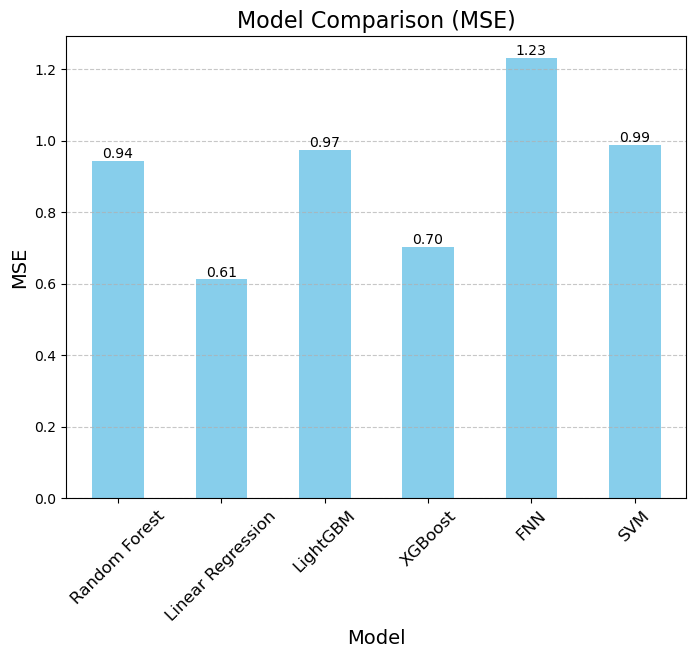

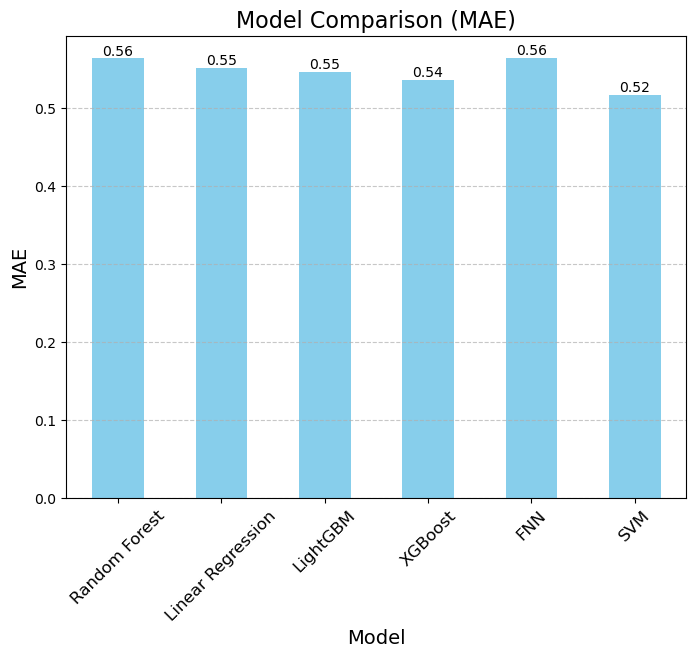

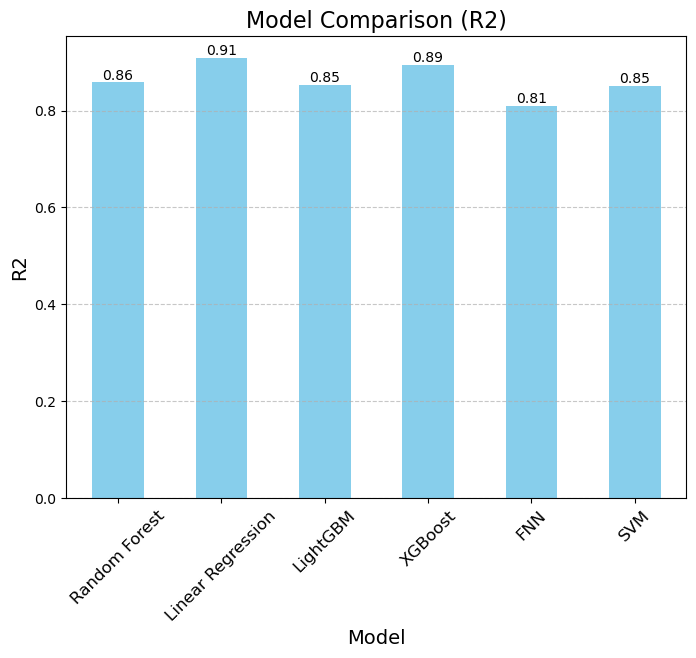

In [20]:
import matplotlib.pyplot as plt

# Model Results
model_results = {
    'Model': ['Random Forest', 'Linear Regression', 'LightGBM', 'XGBoost', 'FNN', 'SVM'],
    'MSE': [RF_mse, LR_mse, LGBM_mse, xgb_mse, DL_mse, SVM_mse],
    'MAE': [RF_mae, LR_mae, LGBM_mae, xgb_mae, DL_mae, SVM_mae],
    'R2': [RF_r2, LR_r2, LGBM_r2, xgb_r2, DL_r2, SVM_r2]
}

# DataFrame for Visualization
df_results = pd.DataFrame(model_results)

# Visualization
metrics = ['MSE', 'MAE', 'R2']
for metric in metrics:
    df_results.plot(x='Model', y=metric, kind='bar', legend=False, figsize=(8, 6), color='skyblue')
    plt.title(f'Model Comparison ({metric})', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on bars
    for index, value in enumerate(df_results[metric]):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Save the plot as an image
    plt.savefig(f'model_comparison_{metric}_new_pca.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

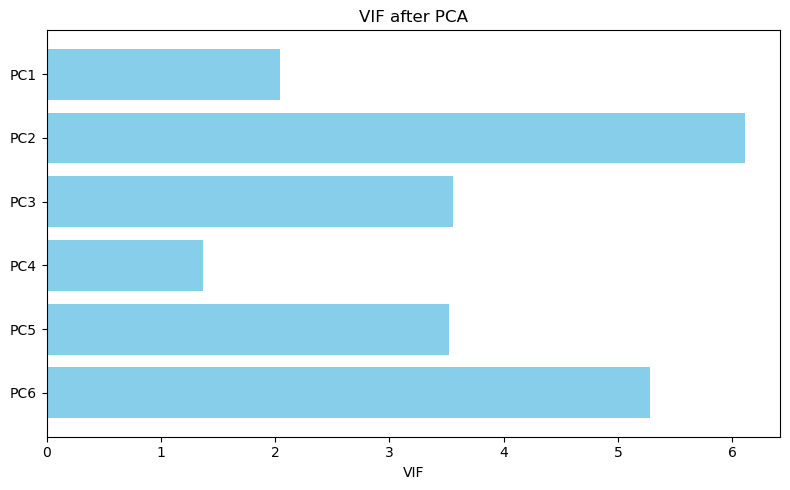

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PCA 적용 후 VIF 계산
vif_data_pca = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])
vif_pca = pd.DataFrame()
vif_pca['Feature'] = vif_data_pca.columns
vif_pca['VIF'] = [variance_inflation_factor(vif_data_pca.values, i) for i in range(vif_data_pca.shape[1])]

# PCA 이후 VIF 시각화
plt.figure(figsize=(8, 5))
plt.barh(vif_pca['Feature'], vif_pca['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('VIF after PCA')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
